# <font color='red'>Customer Segmentation Analysis</font>

## <font color='blue'>1. Importing the libraries

In [353]:
### Data Wrangling
import numpy as np
import pandas as pd
from collections import Counter

### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

### Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from tabulate import tabulate

### Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## <font color='blue'>2. Importing the data

In [355]:
### Fetching the datsets
dataset = pd.read_csv('Mall_Customers.csv')
### Looking at the sample records of the dataset
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [356]:
### Shape of the dataset
dataset.shape

(200, 5)

<font color='darkorange'>The dataset consists of 5 columns and 200 rows.

## <font color='blue'>3. Exploratory Data Analysis (EDA)

### <font color='green'>3.1 Datatypes, Missing Data, and Summary Statistics

In [360]:
### Looking at the datatypes of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [361]:
### Summary statistics of the numerical columns in the dataset
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### <font color='green'>3.2 Feature Analysis

In [363]:
### Understanding the distribution of the numerical column
def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

### <font color='green'>3.2.1 Categorical variable - Gender

In [365]:
### Value counts of the column - Gender
gender_count = dataset['Gender'].value_counts(dropna = False)
gender_count

Gender
Female    112
Male       88
Name: count, dtype: int64

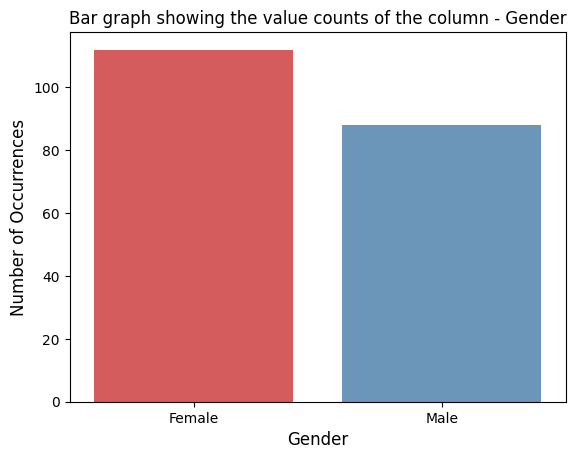

In [366]:
### Bar graph showing the value counts of the column - Gender
sns.barplot(gender_count, alpha = 0.8, palette="Set1")
plt.title('Bar graph showing the value counts of the column - Gender')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

<font color='darkorange'>From the above graph, we can see that most of the customers' of the mall are Female. Now let's see the average Annual Income for each Gender.

In [368]:
### Mean of Annual Income by Gender
gender_income = dataset[['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


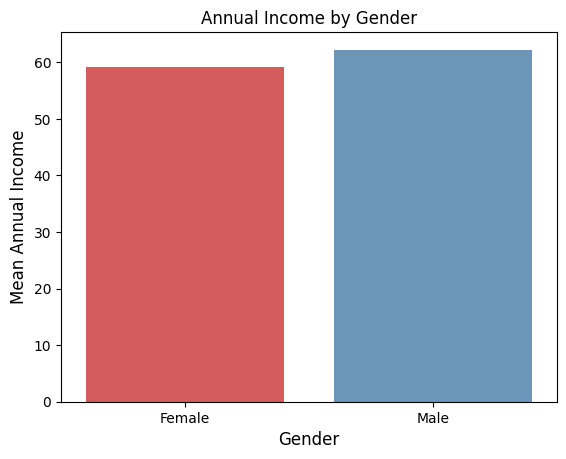

In [369]:
### Mean Annual Income by Gender
sns.barplot(data=gender_income, x='Gender', y='Annual Income (k$)', alpha=0.8, palette="Set1")
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

<font color='darkorange'>From the above graph, we can see that the average annual income is almost similar for both Male and Female.

In [370]:
### Mean Spending Score by Gender
gender_score = dataset[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()
gender_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


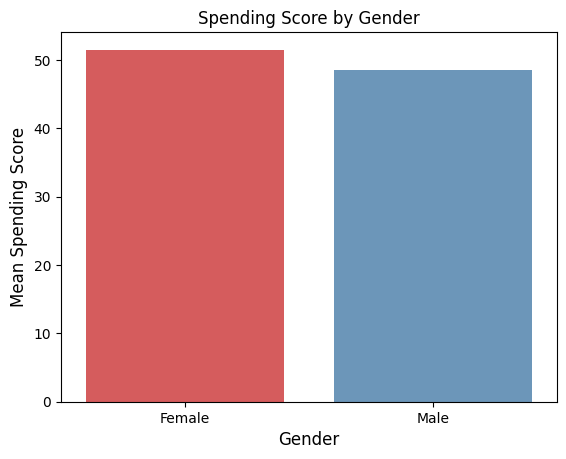

In [371]:
### Mean Spending Score by Gender
sns.barplot(data=gender_score, x='Gender', y='Spending Score (1-100)', alpha = 0.8, palette="Set1")
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

<font color='darkorange'>From the above graph, we can see that the mean spending score is slightly higher in Female than Male.

In [373]:
### Mean Age by Gender
gender_age = dataset[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


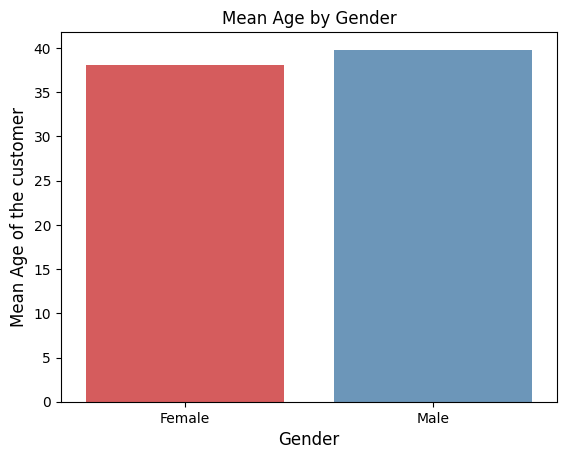

In [374]:
### Mean Age by Gender
sns.barplot(data=gender_age, x= 'Gender', y='Age', alpha = 0.8, palette="Set1")
plt.title('Mean Age by Gender')
plt.ylabel('Mean Age of the customer', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

<font color='darkorange'>From the above graph, we can see that the average age is slightly higher in Male customers than the Female customers.

### <font color='green'>3.2.2 Numerical variable - Age

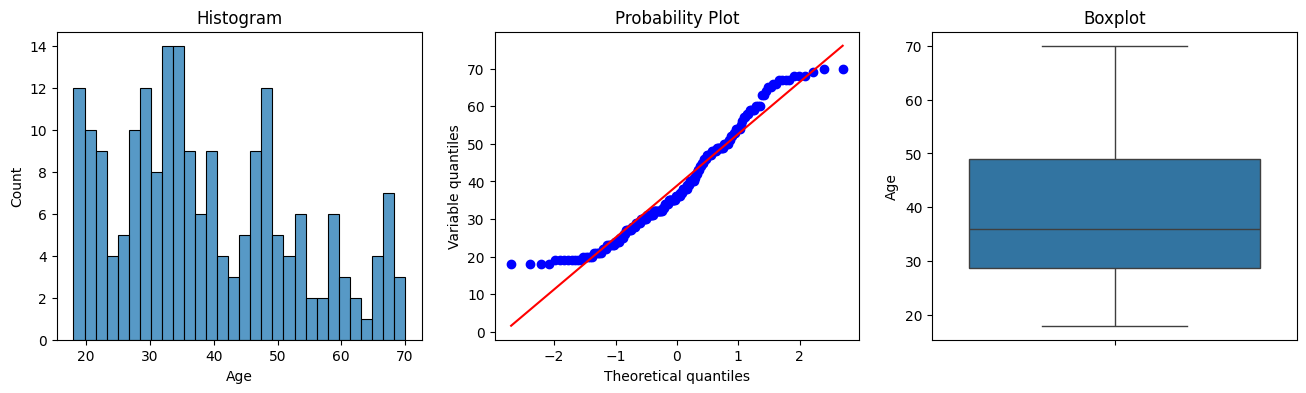

In [377]:
### Understanding the distribution of the column - Age
diagnostic_plots(dataset, 'Age')

<font color='darkorange'>From the above graphs, we can see that the data is slightly skewed and has no outliers.

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

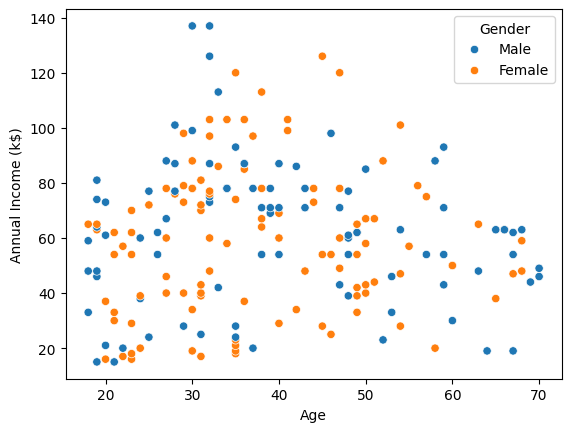

In [379]:
### Scatterplot between Age and Annual Income
sns.scatterplot(data = dataset, x = "Age", y = "Annual Income (k$)", hue = "Gender")

<font color='darkorange'>From the above graph, we can see that there is no significant relationship between Age and Annual Income (k$).

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

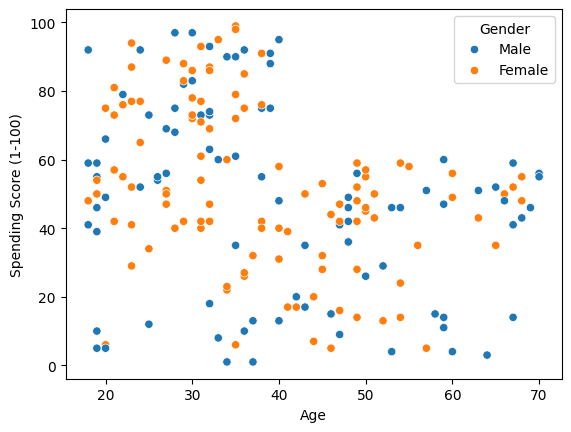

In [381]:
### Scatterplot between Age and Spending Score (1-100)
sns.scatterplot(data = dataset, x = "Age", y = "Spending Score (1-100)", hue = "Gender")

<font color='darkorange'>From the above graph, we can see that there is no significant relationship between Age and Spending Score (1-100).

### <font color='green'>3.2.3 Numerical variable - Annual Income (k$)

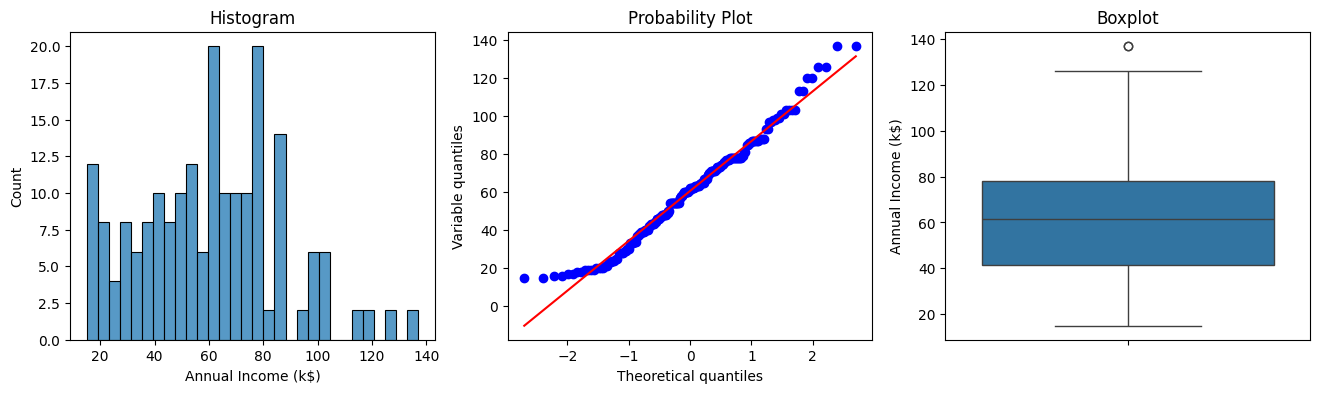

In [384]:
### Understanding the distribution of the column - Annual Income (k$)
diagnostic_plots(dataset, 'Annual Income (k$)')
# From the above graph, we can see that the data has a slight degree of skewness and a hint of an outlier.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

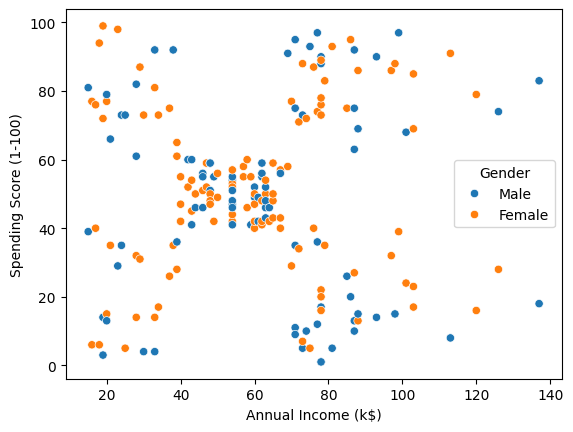

In [385]:
### Scatterplot between Annual Income and Spending Score
sns.scatterplot(data = dataset, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

<font color='darkorange'>From the above graph, we can see the formation of clusters in the data. We will take a look at it using K-Means clustering later in the notebook

### <font color='green'>3.2.4 Numerical variable - Spending Score (1-100)

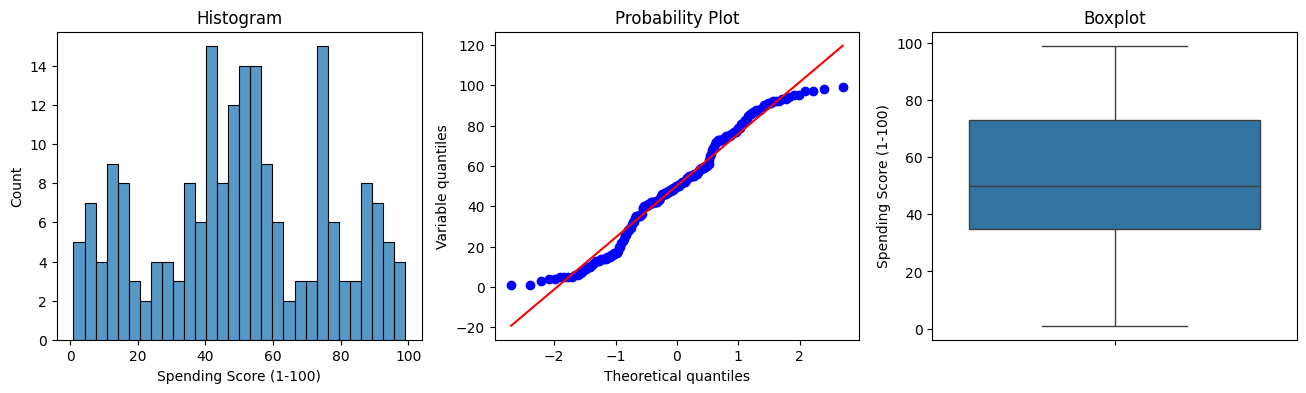

In [388]:
### Understanding the distribution of the column - Spending Score (1-100)
diagnostic_plots(dataset, 'Spending Score (1-100)')

<font color='darkorange'>From the above graph, we can see that the data is slightly skewed and there are no outliers.

## <font color='blue'>4. Data preprocessing

### <font color='green'>4.1 Detect and remove outliers in numerical variables

In [392]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(dataset, 2, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 0 indices:  []


<font color='darkorange'>From the above cell, we can see that there are no significant outliers in the dataset.

### <font color='green'>4.2 Drop and fill missing values

In [395]:
### Dropping the columns - CustomerId from the dataset
dataset.drop(['CustomerID'], axis = 1, inplace = True)
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


<font color='darkorange'>Since the dataset has no missing values, we will focus on removing the counter column - CustomerID.

## <font color='blue'>5. Clustering

<font color='darkorange'>Here, we will use K-Means and Hierarchial clustering for customer segmentation based on:

<font color='darkorange'>1. Age and Spending Score

<font color='darkorange'>2. Annual Income and Spending Score

<font color='darkorange'>3. Age, Annual Income, and Spending Score

<font color='darkorange'>We then select the best model for segmentation using the Silhouette and Calinski Harabasz Scores.</font>

### <font color='green'>5.1 Segmentation using Age and Spending Score (K- Means)

In [400]:
### Filtering the age and spending score from the dataset
X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

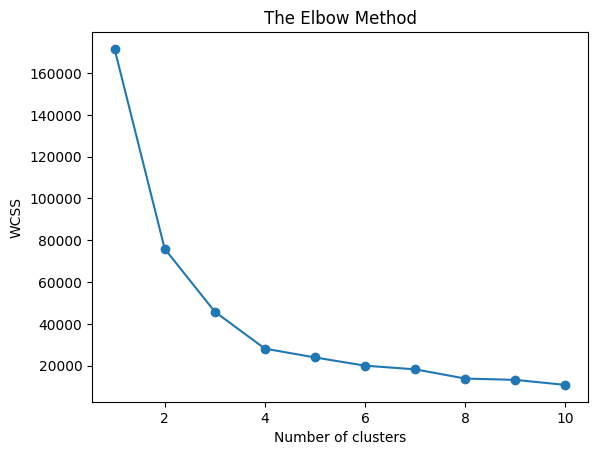

In [401]:
### Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<font color='darkorange'>From the above graph, we can see that the optimal number of clusters are 4.

In [403]:
### Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

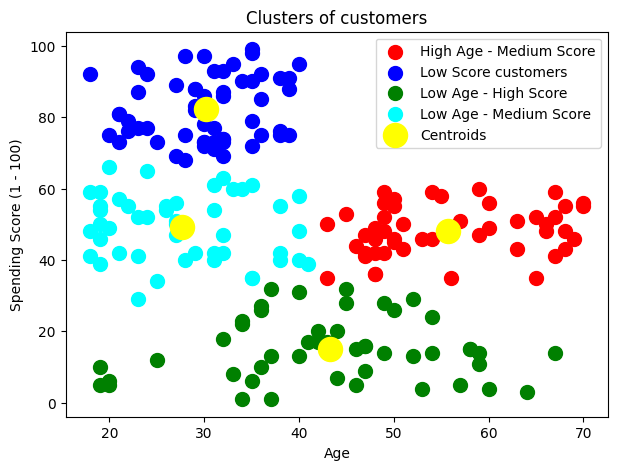

In [404]:
### Visualizing the clusters
plt.figure(figsize = (7, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'High Age - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low Score customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Age - High Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Age - Medium Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

<font color='darkorange'>From the above graph, we can see that there are 5 clusters.

<font color='darkorange'>1. High Age - Medium Score customers: From this cluster, we can see that the customers belonging to this cluster belong to 40+ age group and have a 35 - 60 spending score.

<font color='darkorange'>2. Low Score customers: These are the customers that do not spend a lot in the mall. The target of the mall should be to reduce the number of customers in the blue cluster.

<font color='darkorange'>3. Low Age - High Score customers: From this cluster, we can see that the customers belonging to this cluster belong to <40 age group and have a spending score greater than 70.

<font color='darkorange'>4. Low Age - Medium Score customers: From this cluster, we can see that the customers belonging to this cluster belong to <40 age and have a spending score in the range of 35 and 65.

In [406]:
### Calculating the performance of the clusters
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)
print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.5
Calinski Harabasz Score : 332.56


### <font color='green'>5.2 Segmentation using Age and Spending Score (Hierarchial clustering)

In [408]:
### Filtering the age and spending score from the dataset
X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

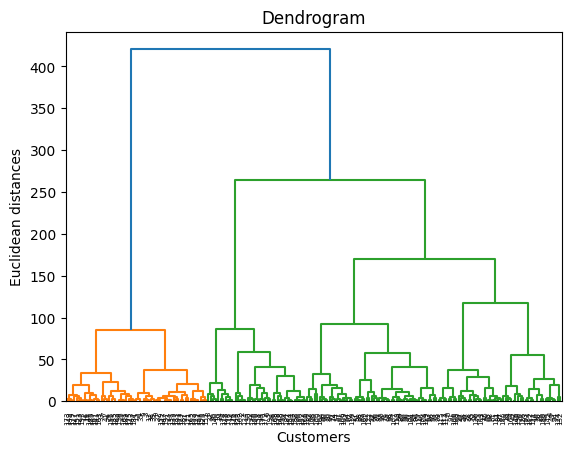

In [409]:
### Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<font color='darkorange'>From the above graph, we can see that the optimal number of clusters are 2.

In [411]:
### Training the Hierarchial clustering model on the dataset
hc = AgglomerativeClustering(n_clusters = 2,  linkage = 'ward')
y_hc = hc.fit_predict(X)

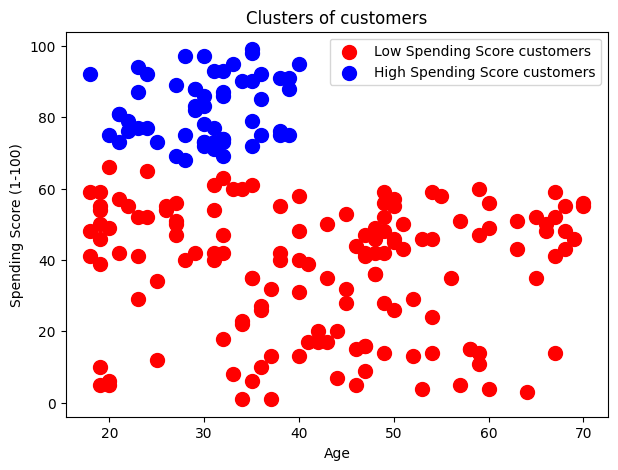

In [412]:
### Visualizing the clusters
plt.figure(figsize = (7, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low Spending Score customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Spending Score customers')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<font color='darkorange'>From the above graph, we can see that there are 2 clusters.

<font color='darkorange'>1. Low Spending Score customers: From the above graph, we can see that these are the customers with low spending score.

<font color='darkorange'>2. High Spending Score customers: From the above graph, we can see that these are the customers with high spending score.

<font color='darkorange'>3. The ideal scenario for the mall should be to reduce the number of customers in the red cluster and increase the number of clusters.

In [414]:
### Calculating the performance of the clusters
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.45
Calinski Harabasz Score : 210.56


In [415]:
### Tabulating the results
table = []
print('Segmentation using Age and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.5  │                    332.56 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.45 │                    210.56 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


<font color='darkorange'>From the above table, we can see that K-Means performs better than Hierarchial clustering on comparing the Silhouette score and Calinski Harabasz score.

### <font color='green'>5.3 Segmentation using Annual Income and Spending Score (K-Means)

In [418]:
### Filtering the annual income and spending score from the dataset
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

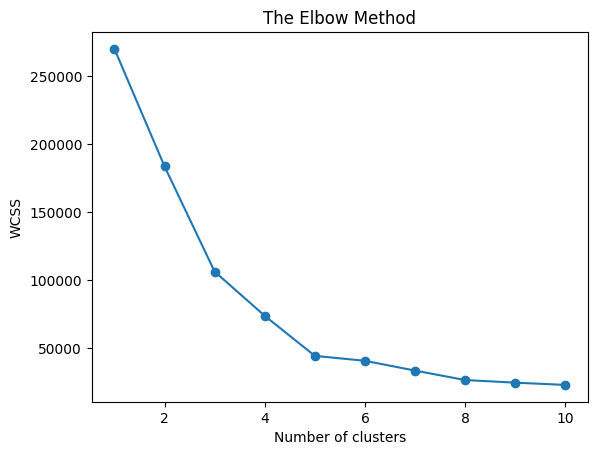

In [419]:
### Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<font color='darkorange'>From the above graph, we can see that the optimal number of clusters are 5.

In [421]:
### Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

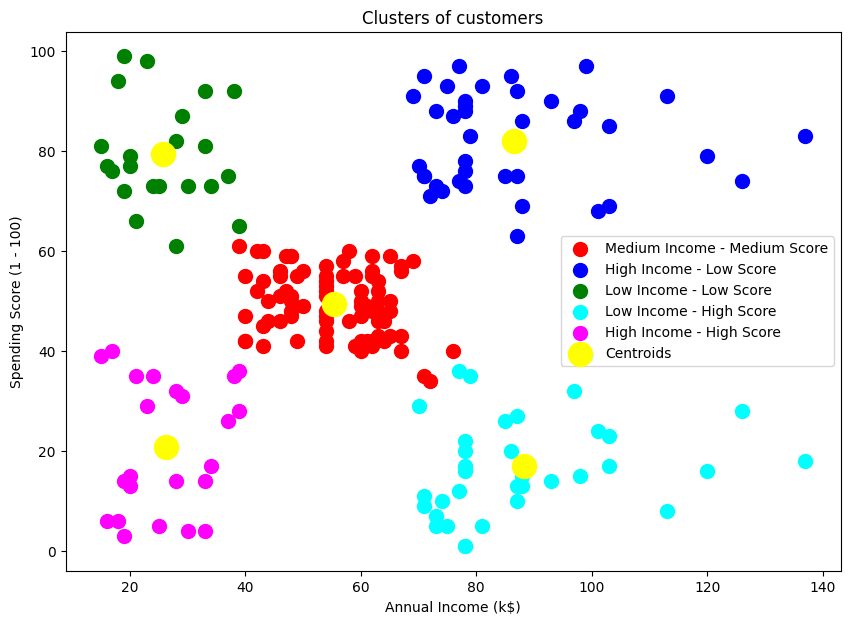

In [422]:
### Visualizing the clusters
plt.figure(figsize = (10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Medium Income - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Income - Low Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income - High Score')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income - High Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

<font color='darkorange'>From the above graph, we can see that there are 5 clusters.

<font color='darkorange'>1. Medium Income - Medium Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of 40 - 80 and have a spending score in the range of 40 - 60.

<font color='darkorange'>2. High Income - Low Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of > 65 and have a spending score of less than 40.

<font color='darkorange'>3. Low Income - Low Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of < 40 and have a spending score of less than 40.

<font color='darkorange'>4. Low Income - High Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of < 40 and have a spending score of greater than 60.

<font color='darkorange'>5. High Income - High Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of > 70 and have a spending score of greater than 60.

<font color='darkorange'>The aim of the mall is to increase the customers present in the cluster 'High Income - High Score' by reducing the customers present in the cluster 'High Income - Low Score' and also to migrate the customers present in the cluster 'Medium Income - Medium Score' to higher spending scores.

In [424]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.55
Calinski Harabasz Score : 247.36


### <font color='green'>5.4 Segmentation using Annual Income and Spending Score (Hierarchial clustering)

In [426]:
### Filtering the annual income and spending score from the dataset
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

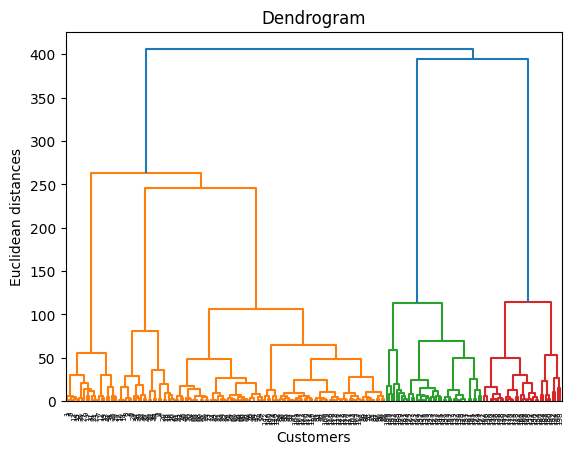

In [427]:
### Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<font color='darkorange'>From the above graph, we can see that the optimal number of clusters are 3.

In [429]:
### Training the Hierarchial clustering model on the dataset
hc = AgglomerativeClustering(n_clusters = 3,  linkage = 'ward')
y_hc = hc.fit_predict(X)

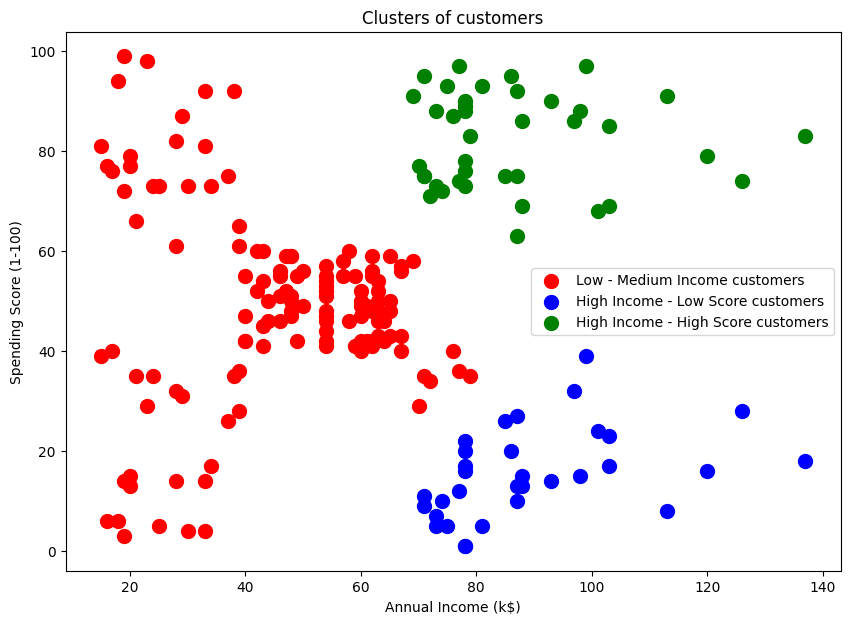

In [430]:
### Visualizing the clusters
plt.figure(figsize = (10, 7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low - Medium Income customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'High Income - High Score customers')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<font color='darkorange'>From the above graph, we can see that there are 3 clusters.

<font color='darkorange'>1. Low - Medium Income customers: From the above graph, we can see that the customers present in this cluster belong to low to medium income groups.

<font color='darkorange'>2. High Income - Low Score customers: From the above graph, we can see that the customers present in this cluster have an income group of > 70 and have a low spending score of < 40.

<font color='darkorange'>3. High Income - High Score customers: From the above graph, we can see that the customers present in this cluster have an income group of > 70 and have a high spending score of > 60.

<font color='darkorange'>The aim of the mall should be to increase the customers present in the cluster 'High Income - High Score customers' by reducing the customers present in the cluster 'High Income - Low Score customers' and also to make efforts to increase the Spending Score of the customers present in the cluster 'Low - Medium Income customers'.

In [432]:
### Calculating the performance of the clusters
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.46
Calinski Harabasz Score : 143.82


In [433]:
### Tabulating the results
table = []
print('Segmentation using Annual Income and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Annual Income and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.55 │                    247.36 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.46 │                    143.82 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


<font color='darkorange'>From the above table, we can see that K-Means performs better than Hierarchial clustering on comparing the Silhouette score and Calinski Harabasz score.

### <font color='green'>5.5 Segmentation using Age, Annual Income, and Spending Score (K-Means)

In [436]:
### Filtering the age, annual income and spending score from the dataset
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

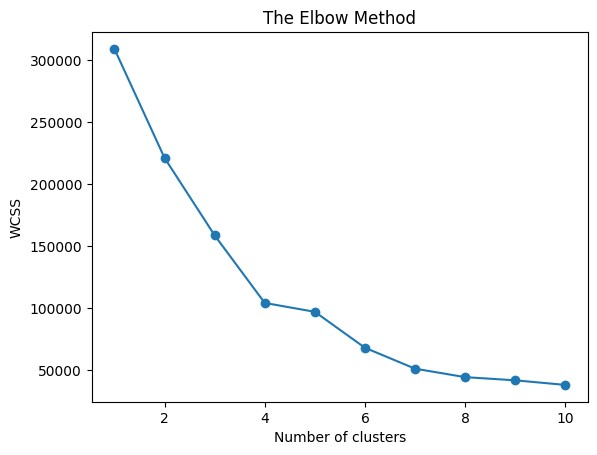

In [437]:
### Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<font color='darkorange'>From the above graph, we can see that the optimal number of clusters are 6.

In [439]:
### Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

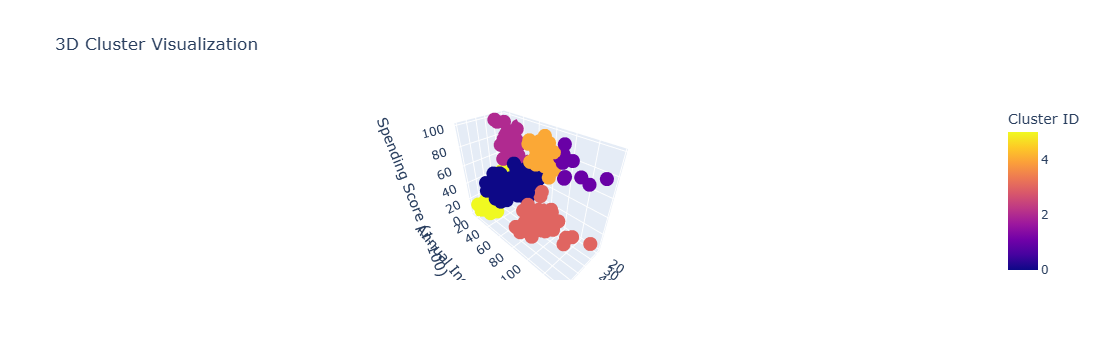

In [440]:
### Visualizing the clusters
# Create a DataFrame with the data and labels
df = pd.DataFrame(X, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df['Cluster'] = y_kmeans
# Create a 3D scatter plot with Plotly Express
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster', 
                    labels={'Cluster': 'Cluster ID'}, title='3D Cluster Visualization')
# Show the plot
fig.show()

In [441]:
### Calculating the performance of the clusters
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.42
Calinski Harabasz Score : 136.69


### <font color='green'>5.6 Segmentation using Age, Annual Income, and Spending Score (Hierarchial Clustering)

In [443]:
### Filtering the age, annual income and spending score from the dataset
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

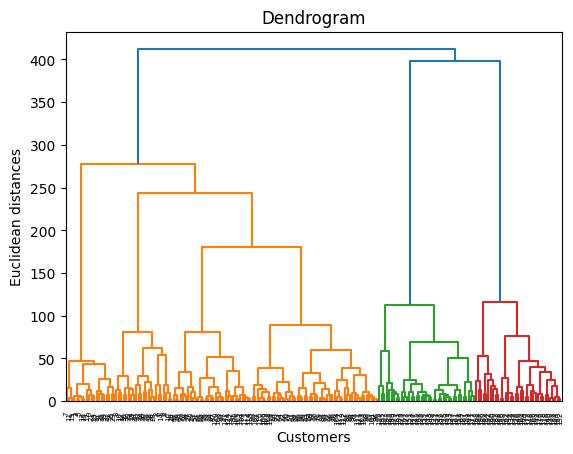

In [444]:
### Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<font color='darkorange'>From the above graph, we can see that the optimal number of clusters are 3.

In [446]:
### Training the Hierarchial clustering model on the dataset
hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
y_hc = hc.fit_predict(X)

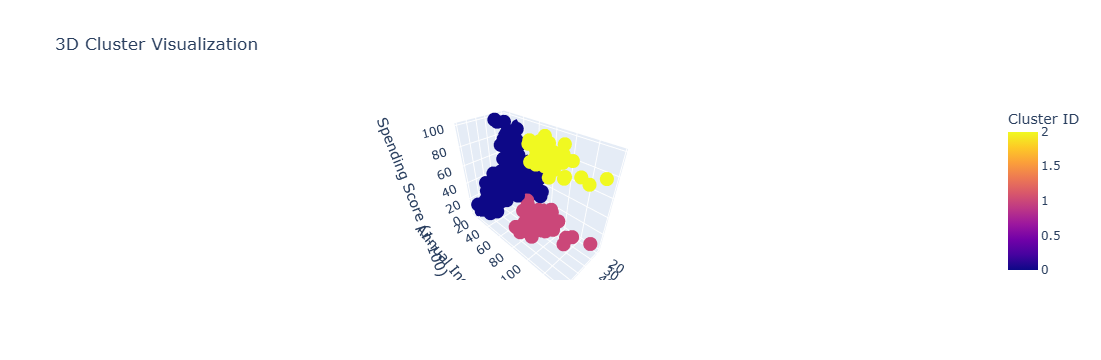

In [447]:
### Visualizing the clusters
# Create a DataFrame with the data and labels
df = pd.DataFrame(X, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df['Cluster'] = y_hc
# Create a 3D scatter plot with Plotly Express
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster', 
                    labels={'Cluster': 'Cluster ID'}, title='3D Cluster Visualization')
# Show the plot
fig.show()

In [448]:
### Calculating the performance of the clusters
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.38
Calinski Harabasz Score : 111.46


In [449]:
### Tabulating the results
table = []
print('Segmentation using Age, Annual Income, and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age, Annual Income, and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.42 │                    136.69 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.38 │                    111.46 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


<font color='darkorange'>From the above table, we can see that K-Means performs better than Hierarchial clustering on comparing the Silhouette score and Calinski Harabasz score.

## <font color='blue'>6. Conclusion

<font color='darkorange'>Hence, K-Means clustering helps the mall in understanding the various customer groups and ways to improve the customer's spending score that helps the business of the mall.

## <font color='blue'>7. Streamlit app

In [824]:
%%writefile CustomerSegmentation.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from tabulate import tabulate

# Set up the title of the app with custom style, FontAwesome icon, and background image
st.markdown("""
    <style>
        .title {
            color: #ff052b;
            font-size: 40px;
            font-weight: bold;
            text-align: center;
        }
        .subtitle {
            color: #05eeff;
            font-size: 17px;
            font-weight: bold;
        }
        .sidebar-title {
            font-size: 20px;
            font-weight: bold;
            color: #1E90FF;
        }
        .metrics {
            color: #28A745;
            font-weight: bold;
        }
        .main {
            background-image: url('https://www.bounteous.com/sites/default/files/insights/2022-10/previews/screen_shot_2022-09-01_at_12.34.57_pm.png');
            background-size: cover;
            background-position: center;

        }
    </style>
    <div class="title">
        <i class="fas fa-users"></i> Customer Segmentation Analysis
    </div>
""", unsafe_allow_html=True)

# Add a description for the app with a custom color and icon
st.markdown("""
    <div class='subtitle'>
        <i class="fas fa-info-circle"></i> Perform customer segmentation with various clustering techniques, such as K-Means, Hierarchical Clustering, DBSCAN, and Gaussian Mixture Models. Upload your dataset, select the algorithm, and explore the results.
        The app will display interactive visualizations and performance metrics to help you better understand the segmentation.
    </div>
""", unsafe_allow_html=True)

# File Upload Section
uploaded_file = st.file_uploader(":orange[Upload your CSV file]", type=["csv"])

if uploaded_file is not None:
    # Read the uploaded dataset
    dataset = pd.read_csv(uploaded_file)
    st.write("### :orange[Dataset Overview:]")
    st.write(dataset.head())

    # 1. **Data Preprocessing**
    st.subheader(':orange[Data Preprocessing]')

    # Display column selection in a sidebar with custom title
    st.sidebar.markdown("<p class='sidebar-title'>Data Selection</p>", unsafe_allow_html=True)
    columns = st.sidebar.multiselect('Select Features', dataset.columns)

    if len(columns) < 2:
        st.error('Please select at least two features for clustering')
    else:
        # Selecting the features from the dataset
        X = dataset[columns].copy()  # Copy the selected columns to avoid modifying the original dataset

        # Handle missing values
        missing_values = dataset.isnull().sum().sum()
        st.write(f":orange[Missing values:] {missing_values}")
        
        if missing_values > 0:
            option = st.selectbox('How would you like to handle missing values?', ['Drop', 'Fill with mean', 'Fill with median'])
            if option == 'Drop':
                X = dataset.dropna(subset=columns).values
            elif option == 'Fill with mean':
                dataset[columns] = dataset[columns].fillna(dataset[columns].mean())
                X = dataset[columns].values
            elif option == 'Fill with median':
                dataset[columns] = dataset[columns].fillna(dataset[columns].median())
                X = dataset[columns].values

        # Encode categorical data (e.g., 'Gender') using Label Encoding
        if 'Gender' in columns:
            le = LabelEncoder()
            X[:, dataset.columns.get_loc('Gender')] = le.fit_transform(dataset['Gender'])

        # Remove outliers based on IQR
        if st.checkbox(":orange[Remove outliers]"):
            Q1 = np.percentile(X, 25, axis=0)
            Q3 = np.percentile(X, 75, axis=0)
            IQR = Q3 - Q1
            outlier_indices = np.where((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)))
            X = np.delete(X, outlier_indices[0], axis=0)

        # Scaling Data
        st.write("### :orange[Scaling Data]")
        scaling_method = st.sidebar.selectbox('Scaling Method', ['StandardScaler', 'MinMaxScaler', 'RobustScaler'])
        
        if scaling_method == 'StandardScaler':
            scaler = StandardScaler()
        elif scaling_method == 'MinMaxScaler':
            scaler = MinMaxScaler()
        elif scaling_method == 'RobustScaler':
            scaler = RobustScaler()
        
        X_scaled = scaler.fit_transform(X)

        # 2. **Clustering Algorithms**
        st.subheader(':orange[Select Clustering Algorithm]')

        clustering_algorithms = ['K-Means', 'Hierarchical Clustering', 'DBSCAN', 'Gaussian Mixture Models', 'Spectral Clustering']
        selected_algorithm = st.selectbox('Choose a Clustering Algorithm:', clustering_algorithms)

        # Initialize cluster labels variable
        y_clusters = None  # This will store the clustering results

        # Create a sidebar for hyperparameter selection
        st.sidebar.header('Hyperparameters')

        # K-Means
        if selected_algorithm == 'K-Means':
            st.write("### :orange[Using K-Means Clustering]")
            kmeans_clusters = st.sidebar.slider("Select number of clusters for K-Means", min_value=2, max_value=10, value=4)
            kmeans = KMeans(n_clusters=kmeans_clusters, init='k-means++', random_state=42)
            y_clusters = kmeans.fit_predict(X_scaled)

            # Performance Metrics
            silhouette_score_kmeans = silhouette_score(X_scaled, y_clusters)
            calinski_kmeans = calinski_harabasz_score(X_scaled, y_clusters)
            davies_kmeans = davies_bouldin_score(X_scaled, y_clusters)

            st.write(f":orange[Silhouette Score (K-Means): {silhouette_score_kmeans:.2f}]")
            st.write(f":orange[Calinski Harabasz Score (K-Means): {calinski_kmeans:.2f}]")
            st.write(f":orange[Davies-Bouldin Score (K-Means): {davies_kmeans:.2f}]")

            # Visualize Clusters
            df_kmeans = pd.DataFrame(X, columns=columns)
            df_kmeans['Cluster'] = y_clusters
            fig_kmeans = px.scatter_3d(df_kmeans, x=columns[0], y=columns[1], z=columns[2], color='Cluster', title="3D K-Means Clustering")
            st.plotly_chart(fig_kmeans)

        # Hierarchical Clustering
        elif selected_algorithm == 'Hierarchical Clustering':
            st.write("### :orange[Using Hierarchical Clustering]")
            hc_clusters = st.sidebar.slider("Select number of clusters for Hierarchical Clustering", min_value=2, max_value=10, value=3)
            hc = AgglomerativeClustering(n_clusters=hc_clusters, linkage='ward')
            y_clusters = hc.fit_predict(X_scaled)

            # Performance Metrics
            silhouette_score_hc = silhouette_score(X_scaled, y_clusters)
            calinski_hc = calinski_harabasz_score(X_scaled, y_clusters)
            davies_hc = davies_bouldin_score(X_scaled, y_clusters)

            st.write(f":orange[Silhouette Score (Hierarchical): {silhouette_score_hc:.2f}]")
            st.write(f":orange[Calinski Harabasz Score (Hierarchical): {calinski_hc:.2f}]")
            st.write(f":orange[Davies-Bouldin Score (Hierarchical): {davies_hc:.2f}]")

            # Visualize Clusters
            df_hc = pd.DataFrame(X, columns=columns)
            df_hc['Cluster'] = y_clusters
            fig_hc = px.scatter_3d(df_hc, x=columns[0], y=columns[1], z=columns[2], color='Cluster', title="3D Hierarchical Clustering")
            st.plotly_chart(fig_hc)

        # DBSCAN
        elif selected_algorithm == 'DBSCAN':
            st.write("### :orange[Using DBSCAN Clustering]")
            eps = st.sidebar.slider('Select epsilon value for DBSCAN', min_value=0.1, max_value=5.0, value=0.5)
            min_samples = st.sidebar.slider('Select minimum samples for DBSCAN', min_value=2, max_value=10, value=5)
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            y_clusters = dbscan.fit_predict(X_scaled)

            # Performance Metrics
            silhouette_score_dbscan = silhouette_score(X_scaled, y_clusters)
            calinski_dbscan = calinski_harabasz_score(X_scaled, y_clusters)
            davies_dbscan = davies_bouldin_score(X_scaled, y_clusters)

            st.write(f":orange[Silhouette Score (DBSCAN): {silhouette_score_dbscan:.2f}]")
            st.write(f":orange[Calinski Harabasz Score (DBSCAN): {calinski_dbscan:.2f}]")
            st.write(f":orange[Davies-Bouldin Score (DBSCAN): {davies_dbscan:.2f}]")

            # Visualize Clusters
            df_dbscan = pd.DataFrame(X, columns=columns)
            df_dbscan['Cluster'] = y_clusters
            fig_dbscan = px.scatter_3d(df_dbscan, x=columns[0], y=columns[1], z=columns[2], color='Cluster', title="3D DBSCAN Clustering")
            st.plotly_chart(fig_dbscan)

        # Gaussian Mixture Models
        elif selected_algorithm == 'Gaussian Mixture Models':
            st.write("### :orange[Using Gaussian Mixture Models (GMM)]")
            gmm_clusters = st.sidebar.slider("Select number of clusters for GMM", min_value=2, max_value=10, value=3)
            gmm = GaussianMixture(n_components=gmm_clusters)
            y_clusters = gmm.fit_predict(X_scaled)

            # Performance Metrics
            silhouette_score_gmm = silhouette_score(X_scaled, y_clusters)
            calinski_gmm = calinski_harabasz_score(X_scaled, y_clusters)
            davies_gmm = davies_bouldin_score(X_scaled, y_clusters)

            st.write(f":orange[Silhouette Score (GMM): {silhouette_score_gmm:.2f}]")
            st.write(f":orange[Calinski Harabasz Score (GMM): {calinski_gmm:.2f}]")
            st.write(f":orange[Davies-Bouldin Score (GMM): {davies_gmm:.2f}]")

            # Visualize Clusters
            df_gmm = pd.DataFrame(X, columns=columns)
            df_gmm['Cluster'] = y_clusters
            fig_gmm = px.scatter_3d(df_gmm, x=columns[0], y=columns[1], z=columns[2], color='Cluster', title="3D GMM Clustering")
            st.plotly_chart(fig_gmm)

        # 3. **PCA for Dimensionality Reduction and Cluster Visualization**
        st.subheader(':orange[PCA for Dimensionality Reduction]')
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
        df_pca['Cluster'] = y_clusters  # This ensures the correct variable is used
        fig_pca = px.scatter(df_pca, x='PCA1', y='PCA2', color='Cluster', title="2D Cluster Visualization (PCA)")
        st.plotly_chart(fig_pca)

else:
    st.error(":orange[Please upload a CSV file to proceed.]")


Overwriting CustomerSegmentation.py
